In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
snmpdata_names = sorted(glob.glob('data-Stanford-09-29-18/*.snmp'))

In [19]:
# from collections import defaultdict    
# dictx = defaultdict(int)
dictx = {}

for x in range(5):
    keyx = 'key_%s'%x
    for value in range(4):
        dictx.setdefault(keyx, []).append(value)

In [20]:
dictx

{'key_0': [0, 1, 2, 3, 0, 1, 2, 3],
 'key_1': [0, 1, 2, 3, 0, 1, 2, 3],
 'key_2': [0, 1, 2, 3, 0, 1, 2, 3],
 'key_3': [0, 1, 2, 3, 0, 1, 2, 3],
 'key_4': [0, 1, 2, 3, 0, 1, 2, 3]}

In [2]:
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + float(s)

In [12]:
def overlap(a, b):
    # return the indices in a that overlap with b, also returns 
    # the corresponding index in b only works if both a and b are unique! 
    # This is not very efficient but it works
    bool_a = np.in1d(a,b)
    ind_a = np.arange(len(a))
    ind_a = ind_a[bool_a]

    ind_b = np.array([np.argwhere(b == a[x]) for x in ind_a]).flatten()
    return ind_a

In [8]:
# TransFile1 = open(snmpdata_names[214])
# TransList1 = TransFile1.readlines()
# half = int(len(TransList1)/2)
# connect_time = [x.split(': ')[-1].split(' \n')[0] for x in TransList1[:half] if "2.2.1.1.2.1.1.2." in x]
# # guest_ip = [x.split(' =')[0].split('4.1.14823.2.2.1.')[-1] for x in TransList1[:half] if "5.2.2.1.1.15." in x]

In [3]:
Guest_time = {}
time_list = []
for y in snmpdata_names[:]:
    connect_time = []
    TransFile = open(y)
    TransList = TransFile.readlines()
    half = int(len(TransList)/2)
    timest = y.split('-')
    times = timest[8]+':'+timest[9]+":"+timest[-1].split('.')[0]
    time_list.append(times)
    connect_time = [x.split(': ')[-1].split(' \n')[0] for x in TransList[:half] if "2.2.1.1.2.1.1.2." in x]
    for x in connect_time:
        Guest_time.setdefault(x, []).append(times)

In [4]:
stay_time = []
guest_stay_time = []
for x in Guest_time:
    a = np.intersect1d(time_list,Guest_time[x])
    b = (get_sec(a[-1])-get_sec(a[0]))/60
    stay_time.append(b)
    if b < 300:
        guest_stay_time.append(b)

In [10]:
def group_consecutives(vals,step = 1):
    run = []
    result = [run]
    expect = None
    for v in vals:
        if(v==expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v+step
    return result

In [18]:
stay_interval = []
for x in Guest_time:
    ki = group_consecutives(overlap(time_list,Guest_time[x]))
    print(len(ki))
    stay_interval.append(ki)

2
1
24
2
2
1
2
1
2
1
2
2
1
2
2
3
3
2
2
1
2
1
2
1
2
1
1
3
4
2
2
2
1
2
1
1
1
1
2
1
2
1
1
2
2
1
5
1
1
2
1
2
1
1
22
1
2
1
1
2
1
3
1
2
3
1
1
2
2
1
1
1
3
1
2
2
1
1
3
1
2
1
1
1
2
1
1
1
1
2
3
1
1
1
1
1
2
2
1
2
1
3
1
2
1
1
4
1
1
2
2
19
1
2
2
1
2
1
1
1
4
1
2
2
1
1
1
5
2
4
1
2
1
1
2
2
1
1
1
2
1
1
1
2
1
2
2
2
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
2
1
9
1
1
1
2
1
1
1
1
1
2
1
2
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
4
1
1
3
1
2
2
3
1
1
2
1
1
2
1
1
1
2
3
1
1
1
1
2
1
2
3
1
1
1
1
1
2
1
2
1
1
1
2
2
1
1
1
3
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
3
1
2
1
2
1
1
1
2
1
1
2
3
1
1
1
1
1
2
2
1
1
1
1
1
3
1
1
1
1
2
2
2
1
2
1
1
1
1
1
2
1
1
1
1
1
3
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
3
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [17]:
len(stay_interval[0])

2

In [5]:
q = sorted(guest_stay_time)
median = int(len(q)/2)
q_median = float("{0:.2f}".format(q[median]))
q_25 = float("{0:.2f}".format(q[int(median/2)]))
q_75 = float("{0:.2f}".format(q[int(median*1.5)]))
less_30 = [x for x in q if x<=30]
ON_30_60 = [x for x in q if x>30 and x<=60]
ON_60_90 = [x for x in q if x>60 and x<=90]
ON_90_120 = [x for x in q if x>90 and x<=120]
over_120 = [x for x in q if x>120]

In [14]:
min_client = float("{0:.2f}".format(np.min(guest_stay_time)))
max_client = float("{0:.2f}".format(np.max(guest_stay_time)))
mean_client = float("{0:.2f}".format(np.mean(guest_stay_time)))

<IPython.core.display.Javascript object>


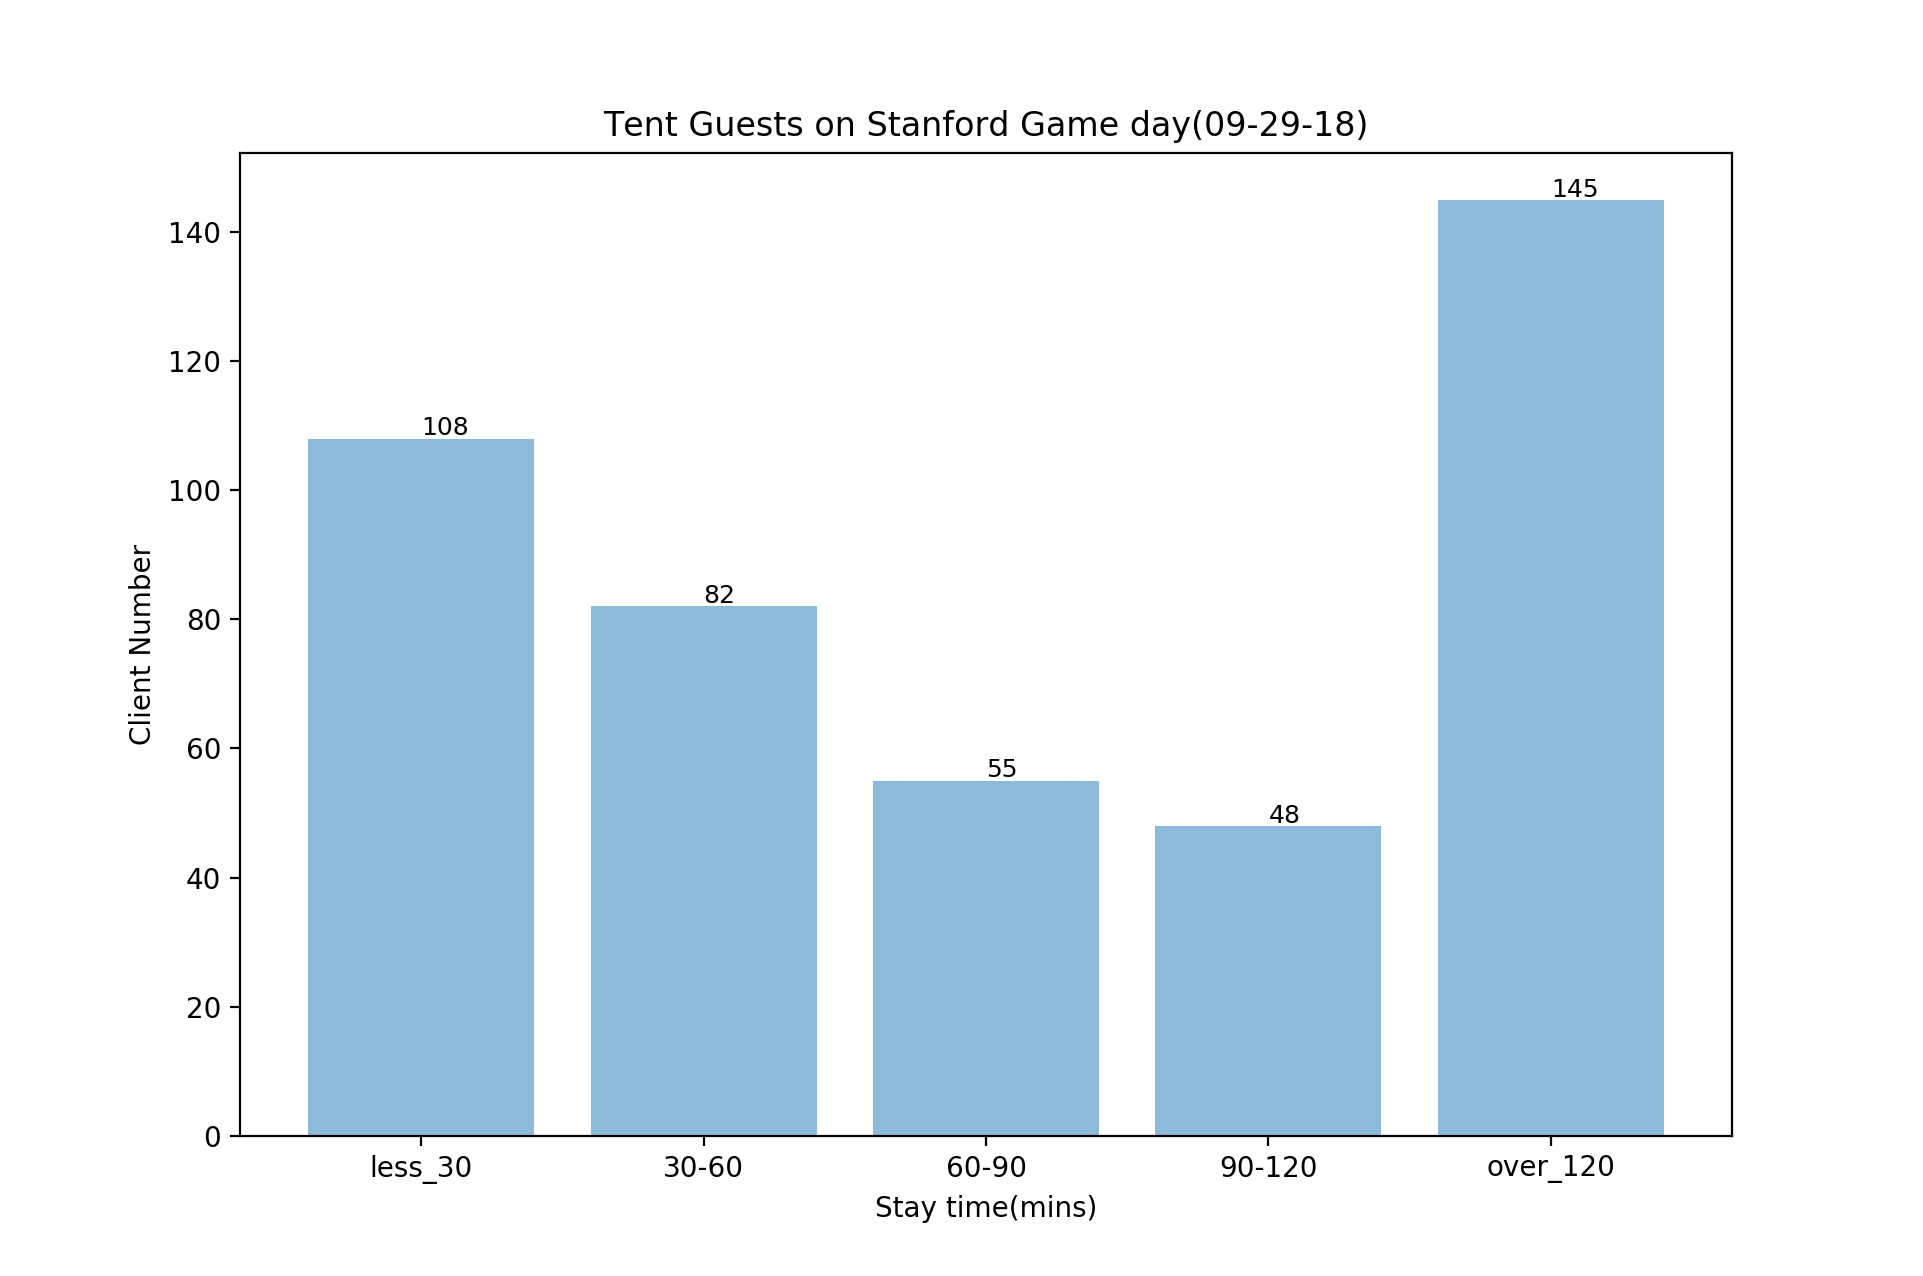

In [55]:
%matplotlib notebook 
objects = ('less_30', '30-60', '60-90', '90-120', 'over_120')
y_pos = np.arange(len(objects))
performance = [len(less_30),len(ON_30_60),len(ON_60_90),len(ON_90_120),len(over_120)+20]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Client Number')
plt.xlabel('Stay time(mins)')
plt.title('Tent Connected Devices number on Stanford Game day(09-29-18)')
for i in range(len(performance)):
    plt.text(x = y_pos[i] , y = performance[i]+0.5, s = performance[i], size = 9)

# for i, v in enumerate(performance):
#     plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()

<IPython.core.display.Javascript object>


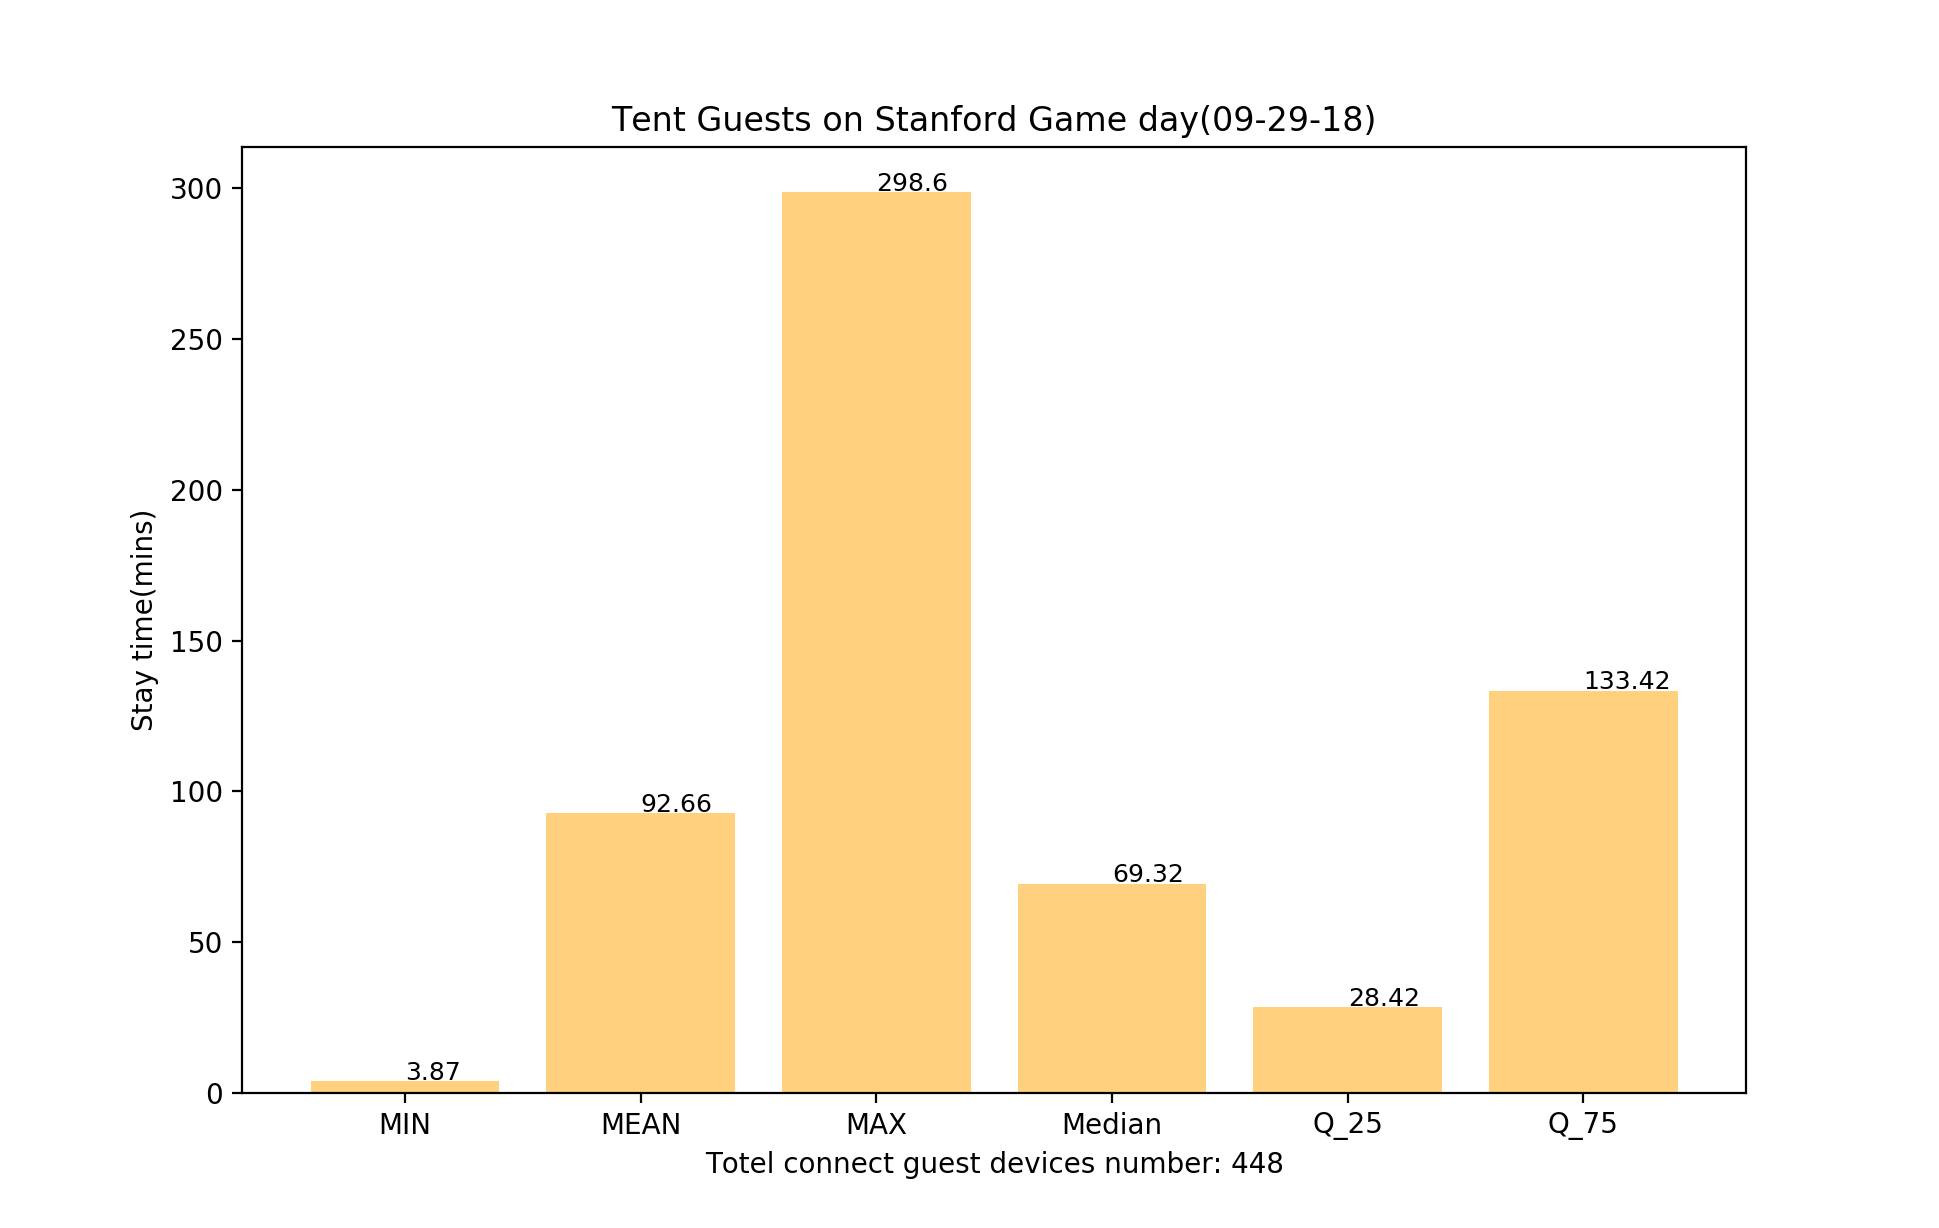

In [54]:
objects = ('MIN', 'MEAN','MAX', 'Median', 'Q_25','Q_75')
y_pos = np.arange(len(objects))
performance = [min_client,mean_client,max_client,(q_median),(q_25),(q_75)]
 
plt.bar(y_pos, performance, align='center',color='Orange', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Stay time(mins)')
plt.xlabel('Totel connect guest devices number: %d'%len(client_Stanford))
plt.title('Tent Connected Devices number on Stanford Game day(09-29-18)')
for i in range(len(performance)):
    plt.text(x = y_pos[i] , y = performance[i]+0.5, s = performance[i], size = 9)

plt.show()

In [ ]:
# stay_time

In [ ]:
# for x in Guest_time.keys():
#     print (x)

In [ ]:
# a = np.intersect1d(time_list, Guest_time['2C 20 0B 23 BE 87'])
# get_sec(a[-1])-get_sec(a[0])

In [ ]:
# x = time_list
# y = Guest_time['70 70 0D DC 07 5F']
# index = np.argsort(x)
# sorted_x = x[index]
# sorted_index = np.searchsorted(sorted_x, y)

# yindex = np.take(index, sorted_index, mode="clip")
# mask = x[yindex] != y

# result = np.ma.array(yindex, mask=mask)

In [22]:
Pitt_names = sorted(glob.glob('data-Pittsburgh-10-12-18/*.snmp'))
Van_names = sorted(glob.glob('data-Vanderbilt-09-15-18/*.snmp'))

In [23]:
Pitt_time = {}
Pitt_time_list = []
for y in Pitt_names[:]:
    Pitt_TransFile = open(y)
    Pitt_TransList = Pitt_TransFile.readlines()
    half = int(len(Pitt_TransList)/2)
    timest = y.split('-')
    times = timest[8]+':'+timest[9]+":"+timest[-1].split('.')[0]
    Pitt_time_list.append(times)
    connect_time = [x.split(': ')[-1].split(' \n')[0] for x in Pitt_TransList[:half] if "2.2.1.1.2.1.1.2." in x]
    for x in connect_time:
        Pitt_time.setdefault(x, []).append(times)

Pitt_stay_time = []
for x in Pitt_time:
    a = np.intersect1d(Pitt_time_list,Pitt_time[x])
    b = (get_sec(a[-1])-get_sec(a[0]))/60
#     stay_time.append(b)
    if b < 300:
        Pitt_stay_time.append(b)

In [24]:
Van_time = {}
Van_time_list = []
for y in Van_names[:]:
    Van_TransFile = open(y)
    Van_TransList = Van_TransFile.readlines()
    half = int(len(Van_TransList)/2)
    timest = y.split('-')
    times = timest[8]+':'+timest[9]+":"+timest[-1].split('.')[0]
    Van_time_list.append(times)
    connect_time = [x.split(': ')[-1].split(' \n')[0] for x in Van_TransList[:half] if "2.2.1.1.2.1.1.2." in x]
    for x in connect_time:
        Van_time.setdefault(x, []).append(times)

Van_stay_time = []
for x in Van_time:
    a = np.intersect1d(Van_time_list,Van_time[x])
    b = (get_sec(a[-1])-get_sec(a[0]))/60
#     stay_time.append(b)
    if b < 300:
        Van_stay_time.append(b)

In [25]:
client_Stanford = [x for x in Guest_time.keys()]
client_Pitt = [x for x in Pitt_time.keys()]
client_Van = [x for x in Van_time.keys()]
intersect_Stanford_Pitt = np.intersect1d(client_Stanford,client_Pitt)
intersect_Van_Pitt = np.intersect1d(client_Van,client_Pitt)
intersect_Van_Stanford = np.intersect1d(client_Van,client_Stanford)
intersect_all = np.intersect1d(intersect_Stanford_Pitt,intersect_Van_Pitt)

In [32]:
len(intersect_all)

62

<IPython.core.display.Javascript object>


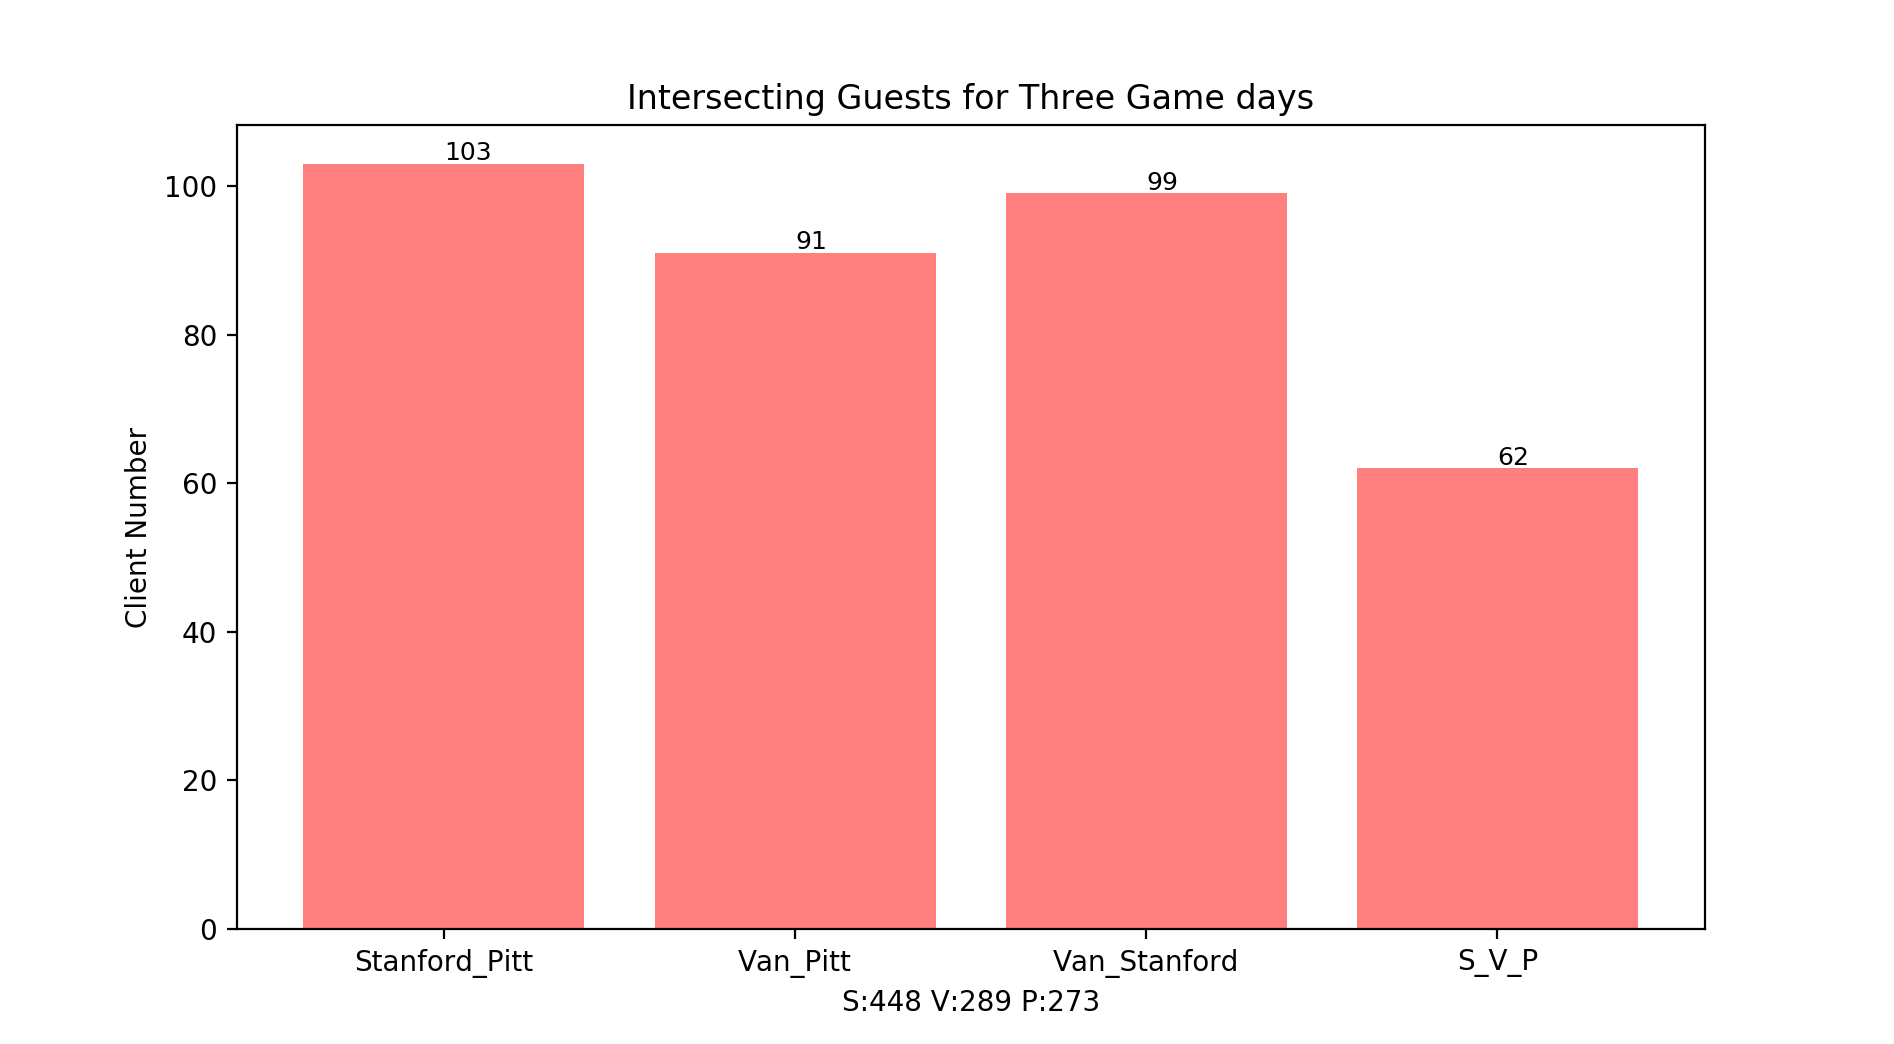

In [53]:
objects = ('Stanford_Pitt', 'Van_Pitt', 'Van_Stanford', 'S_V_P')
y_pos = np.arange(len(objects))
performance = [len(intersect_Stanford_Pitt),len(intersect_Van_Pitt),len(intersect_Van_Stanford),len(intersect_all)]
 
plt.bar(y_pos, performance, align='center',color='red', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Client Number')
plt.xlabel('S:%d V:%d P:%d'%(len(client_Stanford),len(client_Van),len(client_Pitt)))
plt.title('Intersecting Guests for Three Game days')
for i in range(len(performance)):
    plt.text(x = y_pos[i] , y = performance[i]+0.5, s = performance[i], size = 9)
plt.show()